In [3]:
#pip install refinitiv.data

In [42]:
import pandas as pd
import refinitiv.data as rd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
company_list = ['GM' , 'TM', 'F','RIVN.O','HMC','NVDA.O', 'AMD.O','TSM','AAPL.O','NFLX.O','SPY']

In [52]:
rd.open_session()
data = rd.get_data(
    universe = ['TSLA.O'],
    fields = ['TR.TotalReturn1D',
             'TR.CLOSEPRICE.DATE'],
    parameters = {
        'SDate': '2020-03-23',
        'EDate': '2023-11-16',
        'Frq': 'D',
        'RH': 'date'
    }
)
data.set_index('Date', inplace = True)
data.drop(columns = ['Instrument'],inplace = True)
data.columns = ['TSLA.O']
data['TSLA.O'] = data['TSLA.O'].astype('float64')
data.head()

,TSLA.O
Date,
2020-03-23,1.581176
2020-03-24,16.281747
2020-03-25,6.782178
2020-03-26,-2.056560
2020-03-27,-2.612845


In [53]:
for symbol in company_list:
    rd.open_session()
    com_data = rd.get_data(
        universe = [symbol],
        fields = ['TR.TotalReturn1D',
                 'TR.CLOSEPRICE.DATE'],
        parameters = {
            'SDate': '2020-03-23',
            'EDate': '2023-11-16',
            'Frq': 'D',
            'RH': 'date'
        }
    )
    com_data.set_index('Date', inplace = True)
    com_data.drop(columns = ['Instrument'],inplace = True)
    com_data.columns = [symbol]
    com_data[symbol] = com_data[symbol].astype('float64')
    data = pd.merge(data, com_data, left_index = True, right_index = True, how = 'left')

In [54]:
data.head()

,TSLA.O,GM,TM,F,RIVN.O,HMC,NVDA.O,AMD.O,TSM,AAPL.O,NFLX.O,SPY
Date,,,,,,,,,,,,
2020-03-23,1.581176,-2.976847,-4.602439,-7.390300,NaN,-4.243009,3.373026,5.124968,1.639344,-2.124411,8.244449,-2.556818
2020-03-24,16.281747,19.943182,4.725473,23.441397,NaN,9.466264,17.156425,10.999039,7.976138,10.032536,-0.818830,9.060327
2020-03-25,6.782178,1.800095,4.245810,8.888889,NaN,4.783809,-1.428686,-3.440069,0.266012,-0.550875,-4.178328,1.497018
2020-03-26,-2.056560,4.979060,4.163575,-2.597403,NaN,3.950834,4.730885,6.430652,1.775510,5.262300,6.016531,5.838972
2020-03-27,-2.612845,-5.230496,0.712363,-1.142857,NaN,-2.491554,-1.753227,-1.936842,-5.935432,-4.140226,-1.617124,-2.978560


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 922 entries, 2020-03-23 to 2023-11-16
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA.O  922 non-null    float64
 1   GM      922 non-null    float64
 2   TM      922 non-null    float64
 3   F       922 non-null    float64
 4   RIVN.O  507 non-null    float64
 5   HMC     922 non-null    float64
 6   NVDA.O  922 non-null    float64
 7   AMD.O   922 non-null    float64
 8   TSM     922 non-null    float64
 9   AAPL.O  922 non-null    float64
 10  NFLX.O  922 non-null    float64
 11  SPY     922 non-null    float64
dtypes: float64(12)
memory usage: 125.9 KB


In [56]:
data.to_csv('companies_data.csv')

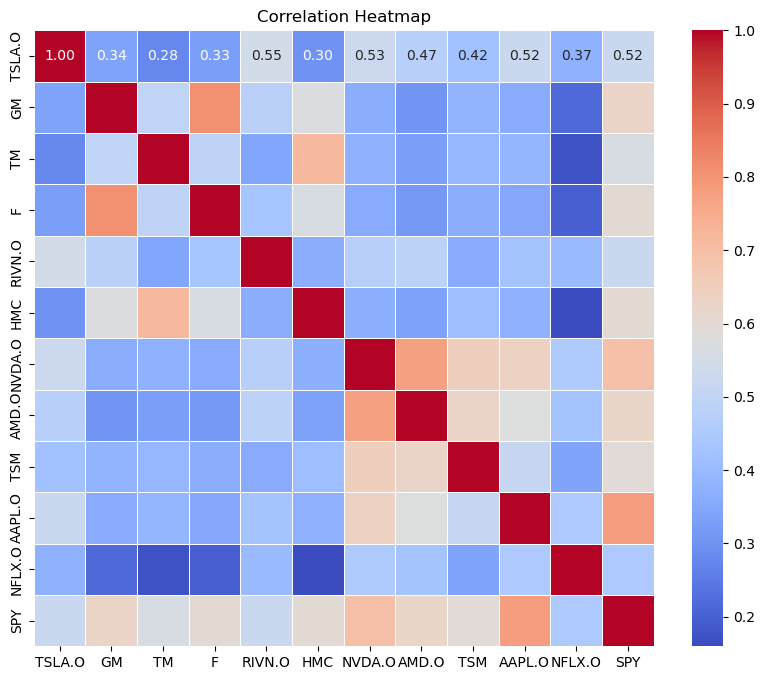

In [61]:
df = pd.read_csv('companies_data.csv',index_col = 'Date')

correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()